# MULTI LINEAR REGRESSION EXAMPLE

In [1]:
import numpy as np

In [2]:
n = 500 #number of data points
X1 = 3 * np.random.rand(n, 1) - 1
X2 = 3 * np.random.rand(n, 1) - 1
X = np.concatenate((X1, X2), axis=1)
X

array([[-2.64830757e-01,  1.81196974e+00],
       [ 1.59876927e+00,  2.82868155e-01],
       [ 1.66476204e+00,  1.90846064e+00],
       [-8.68082935e-01, -8.69300910e-01],
       [-6.14608207e-01,  5.87702074e-01],
       [-8.26471801e-01,  1.99878533e+00],
       [-2.76893815e-01,  3.73549589e-01],
       [ 4.45031786e-01,  4.82959757e-02],
       [-3.25967620e-01, -3.31574428e-02],
       [ 5.52245942e-01,  3.95795071e-01],
       [-9.71527900e-01, -9.84309219e-01],
       [ 1.08248107e+00,  1.26657678e+00],
       [ 9.92117453e-01,  7.84933077e-01],
       [ 1.25171316e+00, -6.39533439e-02],
       [ 9.63215188e-01,  1.75895519e+00],
       [-6.63208931e-01,  1.61680507e+00],
       [ 1.42013222e+00, -5.41555344e-01],
       [-2.85690895e-01,  9.50366020e-02],
       [ 9.39682198e-01, -4.25122947e-01],
       [ 3.42968397e-01,  2.87056696e-01],
       [ 6.14870508e-01,  5.48389537e-01],
       [ 1.03591835e+00,  1.04907278e+00],
       [-4.42550987e-01,  1.75417508e+00],
       [ 1.

## Without Scikit Learn

In [3]:
#Put input data into matrix form.
X_b = np.c_[np.ones((n, 1)), X] 
X_b

array([[ 1.        , -0.26483076,  1.81196974],
       [ 1.        ,  1.59876927,  0.28286815],
       [ 1.        ,  1.66476204,  1.90846064],
       ...,
       [ 1.        ,  0.75438927,  1.13266746],
       [ 1.        ,  0.84561623,  1.78635622],
       [ 1.        , -0.49952901,  1.94557253]])

In [4]:
A, B, C, D = 3, 2, 1, 10

noiseLevel = 3
noise = noiseLevel * np.random.randn(n, 1)
y = -(A*X1 + B*X2 + D) / C + noise
y

array([[-17.89510171],
       [-16.620107  ],
       [-22.80672789],
       [ -4.00665227],
       [ -9.25001722],
       [-11.16425637],
       [-11.2970893 ],
       [-16.79640522],
       [ -7.9931995 ],
       [-14.04454178],
       [ -6.04042513],
       [-19.21926845],
       [-12.47807286],
       [-14.87656794],
       [-19.50111427],
       [-10.23631031],
       [-12.19697335],
       [ -6.15833136],
       [ -7.85315314],
       [-16.60242844],
       [-20.56182988],
       [-15.32255301],
       [-12.52174491],
       [-11.55790019],
       [-18.67013132],
       [-10.87783075],
       [-19.703322  ],
       [ -9.05399886],
       [ -8.53817928],
       [ -8.47511968],
       [-14.08454594],
       [-19.52613113],
       [-13.22114536],
       [-12.81556873],
       [-13.65662089],
       [-20.24218706],
       [-19.4611062 ],
       [-13.76470685],
       [-20.58838813],
       [ -7.02690412],
       [-13.58575126],
       [-11.30567353],
       [-12.48689815],
       [-13

In [5]:
#3 values are expected.(1 for intercept, 2 for coefficients.)
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w_estimate

array([[-10.00129744],
       [ -3.21693289],
       [ -2.09613808]])

In [6]:
#Create 3 data points for predicting.
x11, x21 = 0, 0
x12, x22 = 1.5, 2
x13, x23 = 3, 2.5

X_new = np.array([[x11, x21], [x12, x22], [x13, x23]])
X_new

array([[0. , 0. ],
       [1.5, 2. ],
       [3. , 2.5]])

In [7]:
#Put the new data into matrix form.
X_new_b = np.c_[np.ones((len(X_new), 1)), X_new]
X_new_b

array([[1. , 0. , 0. ],
       [1. , 1.5, 2. ],
       [1. , 3. , 2.5]])

In [8]:
y_predict = X_new_b.dot(w_estimate)
y_predict

array([[-10.00129744],
       [-19.01897292],
       [-24.89244129]])

## Using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()

In [11]:
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([-10.00129744]), array([[-3.21693289, -2.09613808]]))

The results found for intercept and coefficients are the same with w_estimate.

In [13]:
lin_reg.predict(X_new)

array([[-10.00129744],
       [-19.01897292],
       [-24.89244129]])

The predicted y values are also the same.

In [14]:
# Use below code for the estimation of plane parameters (A_hat, B_hat, C_hat, D_hat) 
# See http://pi.math.cornell.edu/~froh/231f08e1a.pdf
p0 = [0, 0]
p1 = [1, 1]
p2 = [0, 1]
Xi = np.array([p0, p1, p2])
Zi = lin_reg.predict(Xi)

P = np.c_[Xi, Zi]
v1 = P[1] - P[0]
v2 = P[2] - P[0]
N = np.cross(v1, v2)

A_hat = N[0]
B_hat = N[1]
C_hat = N[2]
D_hat = -C_hat*Zi[0]
#These cell of code requires some vector algebra knowledge.
#The original plane parameters (A,B,C,D) can be used as estimated parameters.
#So instead this code cell, below cell can be used.(Comment one of them.)

In [15]:
#A_hat = A
#B_hat = B
#C_hat = C
#D_hat = D

In [16]:
print("Original plane parameters:  A =", A, ", B =", B, ", C =", C, ", D =", D)
print("Estimated plane parameters: A_hat =", A_hat, ", B_hat =", B_hat, ", C_hat =", C_hat, ", D_hat =", D_hat)

Original plane parameters:  A = 3 , B = 2 , C = 1 , D = 10
Estimated plane parameters: A_hat = 3.2169328877228462 , B_hat = 2.096138076386719 , C_hat = 1.0 , D_hat = [10.00129744]


In [17]:
#Draw the grid
m = 25
xx, yy = np.meshgrid(np.linspace(-2, 3, m), np.linspace(-2, 3, m))
zz = -(A_hat*xx - B_hat*yy + D_hat) * 1. / C_hat   # grid points on true plane

# add x0 = 1 to each instance
X_g = np.c_[xx.flatten(), yy.flatten()] 
zz = lin_reg.predict(X_g).reshape(m, m)   # grid points on estimated plane (using multiple linear regression)

y_hat = lin_reg.predict(X)
# y_hat

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

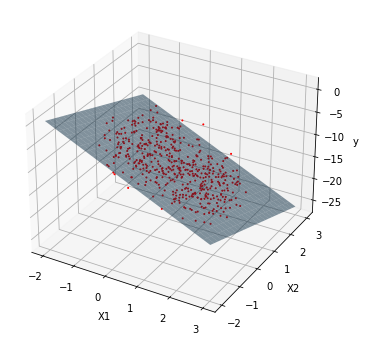

Red points are input data points: y


In [19]:
#Show the data points in 3-D
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y, color='red', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
plt.show()
print("Red points are input data points: y")

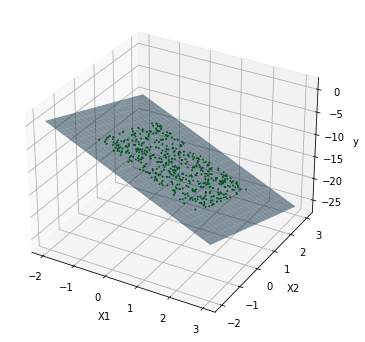

Green points are estimated values.


In [20]:
ax = plt.figure(figsize=(12, 6)).gca(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.scatter(X1, X2, y_hat, color='green', s=1, alpha=1)
ax.set(xlabel='X1', ylabel='X2', zlabel='y')
plt.show()
print("Green points are estimated values.")